# CNN Training

#### Library & CNN imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from scripts.dataset_prep import dataset_prep
from scripts.cnn_model import cnn

#### Image Dataset Acquisition

In [2]:
dataset_prep()

train_dir = "data/training"
val_dir = "data/validation"
test_dir = "data/test"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, 
    image_size=(128, 128),  
    batch_size=32,          
    label_mode='int',        
    color_mode="grayscale"  
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, 
    image_size=(128, 128), 
    batch_size=32, 
    label_mode='int',
    color_mode="grayscale"  
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, 
    image_size=(128, 128), 
    batch_size=32, 
    label_mode='int',
    color_mode="grayscale" 
)

class_names = train_dataset.class_names
print("Class names:", class_names)

created_images dataset successfully downsized, shuffled & split into training, validation, and test sets using file links
Found 25842 files belonging to 8 classes.
Found 7745 files belonging to 8 classes.
Found 3912 files belonging to 8 classes.
Class names: ['APC', 'LBB', 'NOR', 'PAB', 'PVC', 'RBB', 'VEB', 'VFW']


In [3]:
model = cnn()

model.summary()

trained_cnn = model.fit(train_dataset, validation_data = val_dataset, epochs = 5)

c:\Users\ethol\College\FinalYearProject\ECG-signal-preprocessing\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,323,848 (12.68 MB)

 Trainable params: 3,323,848 (12.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 124s 153ms/step - accuracy: 0.7050 - loss: 7.8189 - val_accuracy: 0.8981 - val_loss: 0.3132
Epoch 2/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 112s 139ms/step - accuracy: 0.9197 - loss: 0.2394 - val_accuracy: 0.9243 - val_loss: 0.2392
Epoch 3/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 114s 141ms/step - accuracy: 0.9490 - loss: 0.1460 - val_accuracy: 0.9312 - val_loss: 0.2404
Epoch 4/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 112s 138ms/step - accuracy: 0.9630 - loss: 0.1058 - val_accuracy: 0.9400 - val_loss: 0.2500
Epoch 5/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 114s 141ms/step - accuracy: 0.9727 - loss: 0.0805 - val_accuracy: 0.9332 - val_loss: 0.3092


### CNN Evaluation

123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9330 - loss: 0.2885
Test Accuracy: 93.66%


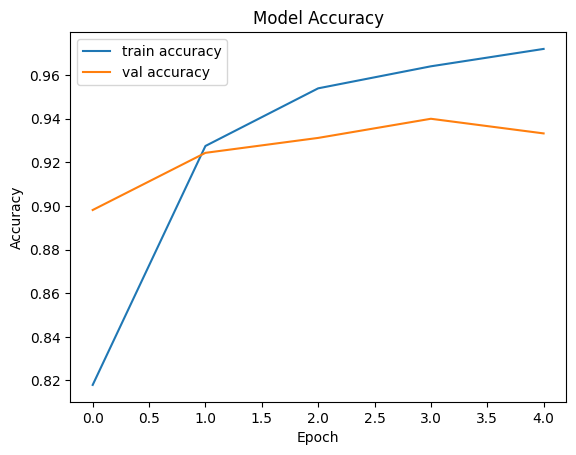

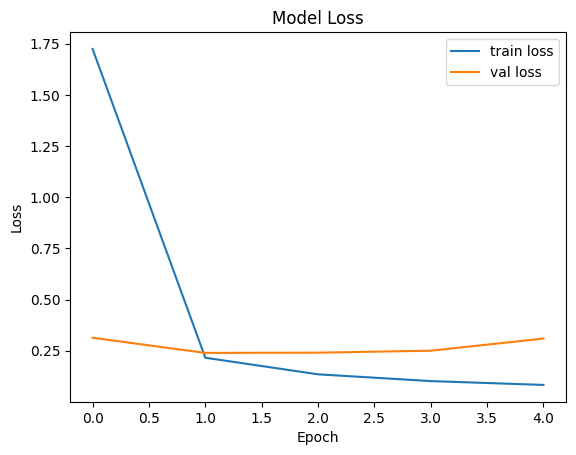

In [4]:
# evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualizing training & validation accuracy
plt.plot(trained_cnn.history['accuracy'], label='train accuracy')
plt.plot(trained_cnn.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizing training & validation loss
plt.plot(trained_cnn.history['loss'], label='train loss')
plt.plot(trained_cnn.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()